<a href="https://colab.research.google.com/github/shruti033456/Restaurant-analysis-/blob/main/cognifyztask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np

Loading the dataset

In [ ]:
data = pd.read_csv('/content/Dataset .csv')

Finding the missing values

In [ ]:
print(data.head().to_string(index=False))
print(data.isnull().sum().to_frame('Missing Values'))

 Restaurant ID        Restaurant Name  Country Code             City                                                                 Address                                   Locality                                             Locality Verbose  Longitude  Latitude                         Cuisines  Average Cost for two         Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes
       6317637       Le Petit Souffle           162      Makati City Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City  Century City Mall, Poblacion, Makati City       Century City Mall, Poblacion, Makati City, Makati City 121.027535 14.565443       French, Japanese, Desserts                  1100 Botswana Pula(P)               Yes                  No                No                   No            3               4.8   Dark Green   Excellent    314
       6304287       Izakaya Kikufuji       

Handling the missing values

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.shape

(9542, 21)

In [ ]:
data = data.drop('Restaurant ID', axis=1)
data = data.drop('Restaurant Name', axis=1)
data = data.drop('Country Code', axis=1)
data = data.drop('City', axis=1)
data = data.drop('Address', axis=1)
data = data.drop('Locality', axis=1)
data = data.drop('Locality Verbose', axis=1)
data = data.drop('Longitude', axis=1)
data = data.drop('Latitude', axis=1)
data = data.drop('Cuisines', axis=1)
data = data.drop('Currency', axis=1)

Encode categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Has Table booking'] = le.fit_transform(data['Has Table booking'])
data['Has Online delivery'] = le.fit_transform(data['Has Online delivery'])
data['Is delivering now'] = le.fit_transform(data['Is delivering now'])
data['Switch to order menu'] = le.fit_transform(data['Switch to order menu'])
data['Rating color'] = le.fit_transform(data['Rating color'])
data['Rating text'] = le.fit_transform(data['Rating text'])

In [ ]:
print(data.describe())

       Average Cost for two  Has Table booking  Has Online delivery  \
count           9542.000000        9542.000000          9542.000000   
mean            1200.326137           0.121358             0.256864   
std            16128.743876           0.326560             0.436927   
min                0.000000           0.000000             0.000000   
25%              250.000000           0.000000             0.000000   
50%              400.000000           0.000000             0.000000   
75%              700.000000           0.000000             1.000000   
max           800000.000000           1.000000             1.000000   

       Is delivering now  Switch to order menu  Price range  Aggregate rating  \
count        9542.000000                9542.0  9542.000000       9542.000000   
mean            0.003563                   0.0     1.804968          2.665238   
std             0.059589                   0.0     0.905563          1.516588   
min             0.000000            

In [ ]:
data.shape

(9542, 10)

Splitting the dataset into Training set on Test set

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Aggregate rating', axis = 1)
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 250)

In [ ]:
X_train.head()
y_train.head()

5883    3.8
5470    3.2
5790    0.0
5588    0.0
9283    4.1
Name: Aggregate rating, dtype: float64

In [ ]:
print(X_train.head())

      Average Cost for two  Has Table booking  Has Online delivery  \
5883                   400                  0                    1   
5470                   200                  0                    0   
5790                   200                  0                    0   
5588                   200                  0                    0   
9283                800000                  0                    0   

      Is delivering now  Switch to order menu  Price range  Rating color  \
5883                  0                     0            1             5   
5470                  0                     0            1             2   
5790                  0                     0            1             4   
5588                  0                     0            1             4   
9283                  0                     0            3             1   

      Rating text  Votes  
5883            2    121  
5470            0     15  
5790            3      0  
5588          

In [ ]:
X_train.shape
y_train.shape

(7633,)

Training a Decision tree Model on the training set

In [ ]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

Evaluate the model using mean-squared error

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.05200775742070372


Interpreting the model's result

                      Average Cost for two  Has Table booking  \
Average Cost for two              1.000000           0.007733   
Has Table booking                 0.007733           1.000000   
Has Online delivery              -0.019017           0.101041   
Is delivering now                -0.001866          -0.016838   
Switch to order menu                   NaN                NaN   
Price range                       0.075111           0.502166   
Aggregate rating                  0.051864           0.190351   
Rating color                     -0.050005          -0.021371   
Rating text                       0.031440           0.044014   
Votes                             0.067833           0.169619   

                      Has Online delivery  Is delivering now  \
Average Cost for two            -0.019017          -0.001866   
Has Table booking                0.101041          -0.016838   
Has Online delivery              1.000000           0.101713   
Is delivering now           

<function matplotlib.pyplot.show(close=None, block=None)>

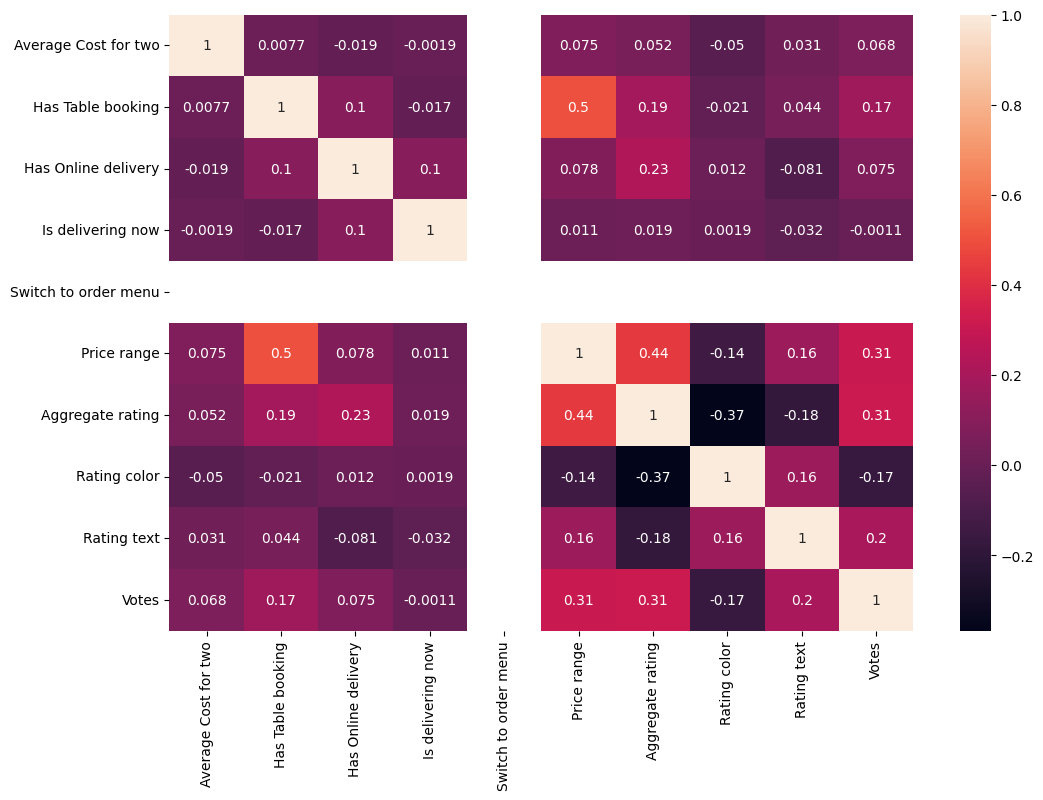

In [ ]:
import seaborn as sns
plt.figure(figsize = (12,8))
print(data.corr())
dataplot = sns.heatmap(data.corr(), annot=True)
plt.show